# Inspecting NYPD Arrests Data

### Purpose:
This code loads the NYPD Arrests dataset in CSV format and displays the first few rows to understand the structure and content of the data.

### Steps:
1. **Load Dataset**:
   - The dataset is read from the file `NYPD_Arrests_Data__Historic_.csv` into a pandas DataFrame.

2. **Preview Data**:
   - The `head()` method is used to display the first few rows of the dataset.

### Output:
- Displays the first 5 rows of the dataset to inspect columns, data types, and a snapshot of the dataset.


In [12]:
import pandas as pd

# Load the Excel file to inspect the data
data = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")
data.head()


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,186134240,08/07/2018,184.0,NaN,NaN,NaN,PL 12070E1,F,K,73,0.0,45-64,M,BLACK,1007585.0,183788.0,40.671110,-73.915881,POINT (-73.91588130999997 40.67110980800004)
1,220476154,11/13/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
2,199148493,07/01/2019,440.0,NaN,NaN,NaN,PL 1553502,F,M,23,1.0,25-44,M,BLACK HISPANIC,998829.0,226859.0,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007)
3,209928408,02/22/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,M,32,0.0,25-44,M,BLACK,1001610.0,241367.0,40.829163,-73.937272,POINT (-73.93727189399993 40.829163304000076)
4,220330574,11/10/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,49,0.0,25-44,M,WHITE,1024396.0,250744.0,40.854826,-73.854880,POINT (-73.85487970999998 40.85482622300003)


# Borough-Level Crime Statistics Analysis

### Purpose:
This code analyzes the dataset to compute crime statistics grouped by borough (`ARREST_BORO`).

### Steps:
1. **Group and Aggregate Data**:
   - Grouped by `ARREST_BORO` to calculate:
     - **`number_of_crimes`**: Total number of records (arrests).
     - **`unique_arrests`**: Number of unique arrests based on `ARREST_KEY`.
     - **`unique_pd_desc`**: Count of unique offense descriptions (`PD_DESC`).

2. **Calculate Average Crimes per Arrest**:
   - Added a new column `average_crimes_per_arrest` to show the ratio of total crimes to unique arrests for each borough.

3. **Reset Index**:
   - Reset the index for easier inspection of the resulting DataFrame.

### Output:
The resulting DataFrame contains borough-level crime statistics, providing insights into crime patterns and arrest efficiency across boroughs.


In [13]:
# Group by 'ARREST_BORO' to count the number of crimes (records), and number of unique arrests
borough_crime_stats = data.groupby('ARREST_BORO').agg(
    number_of_crimes=pd.NamedAgg(column='ARREST_KEY', aggfunc='count'),
    unique_arrests=pd.NamedAgg(column='ARREST_KEY', aggfunc='nunique'),
    unique_pd_desc=pd.NamedAgg(column='PD_DESC', aggfunc=lambda x: x.nunique())
)

# Calculate average crimes per arrest
borough_crime_stats['average_crimes_per_arrest'] = borough_crime_stats['number_of_crimes'] / borough_crime_stats['unique_arrests']

borough_crime_stats.reset_index()


,ARREST_BORO,number_of_crimes,unique_arrests,unique_pd_desc,average_crimes_per_arrest
0,B,1310266,1310266,386,1.0
1,K,1586366,1586366,418,1.0
2,M,1530331,1530331,410,1.0
3,Q,1091359,1091359,408,1.0
4,S,207192,207192,342,1.0


# Revising Borough Crime Statistics

### Purpose:
This code refines the `borough_crime_stats` DataFrame by removing specific columns and resetting the index for further analysis.

### Steps:
1. **Drop Columns**:
   - Removed the following columns:
     - **`unique_arrests`**: Number of unique arrests.
     - **`average_crimes_per_arrest`**: Ratio of crimes to arrests.

2. **Reset Index**:
   - Reset the index of the resulting DataFrame for better accessibility and presentation.

### Output:
The revised DataFrame, `revised_borough_crime_stats`, focuses on:
- Total number of crimes.
- Unique offense descriptions (`PD_DESC`).

This refined data is ready for further visualization or analysis.


In [14]:
# Dropping the 'unique_arrests' and 'average_crimes_per_arrest' columns
revised_borough_crime_stats = borough_crime_stats.drop(columns=['unique_arrests', 'average_crimes_per_arrest'])
revised_borough_crime_stats.reset_index()


,ARREST_BORO,number_of_crimes,unique_pd_desc
0,B,1310266,386
1,K,1586366,418
2,M,1530331,410
3,Q,1091359,408
4,S,207192,342


# Visualizing Borough Crime Statistics

### Purpose:
This code visualizes the borough-level crime statistics using bar and line plots for better understanding.

### Steps:
1. **Bar Plot**:
   - Displays the total number of crimes (`number_of_crimes`) by borough (`ARREST_BORO`).
   - Uses a blue color palette for visual clarity.
   - Labels axes and rotates x-axis labels for better readability.

2. **Line Plot**:
   - Plots the number of unique offense descriptions (`unique_pd_desc`) for each borough.
   - Uses markers and a solid line style for clear visualization.
   - Includes labels, a legend, and gridlines to enhance interpretability.

### Output:
1. **Bar Chart**: Shows the total number of crimes for each borough.
2. **Line Chart**: Illustrates the diversity of crime descriptions across boroughs.

These visualizations help in comparing boroughs based on total crimes and the variety of offenses.


/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_28947/1702160994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_crime_stats.reset_index(), x='ARREST_BORO', y='number_of_crimes', palette="Blues_d")


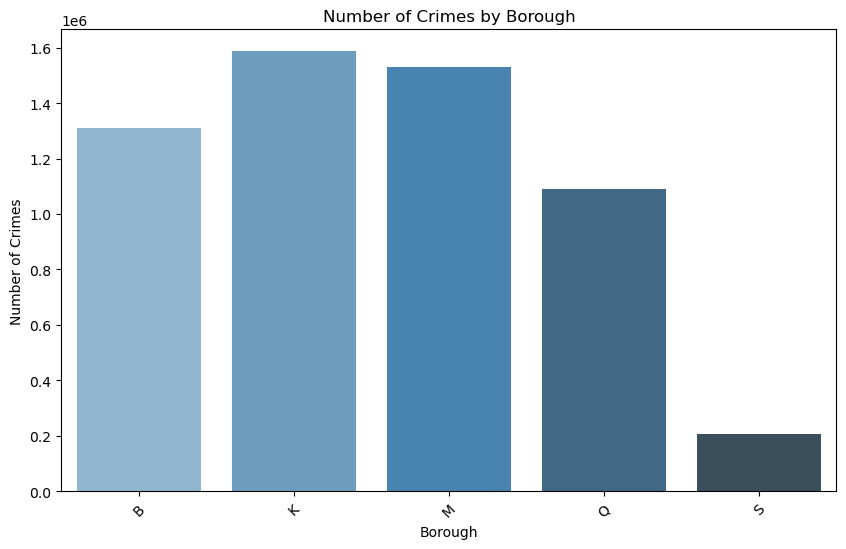

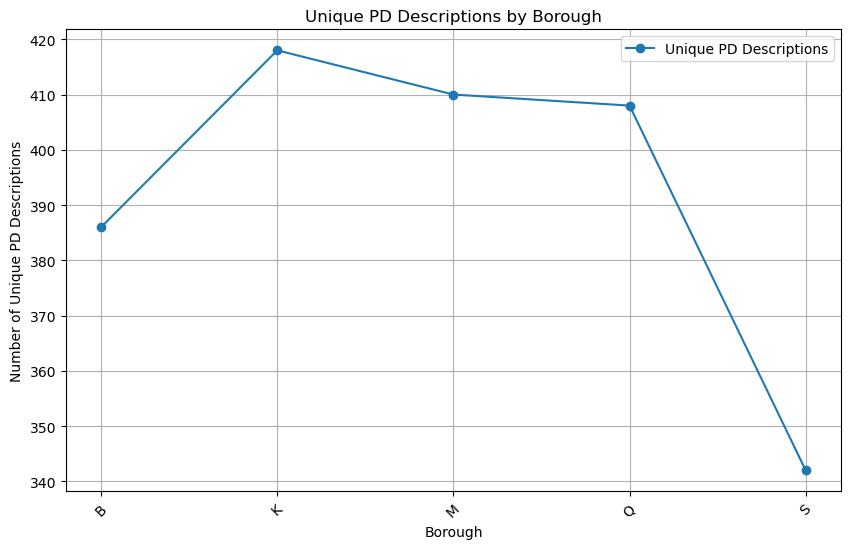

In [15]:
# Creating the DataFrame with the provided data
data_dict = {
    'ARREST_BORO': ['B', 'K', 'M', 'Q', 'S'],
    'number_of_crimes': [1310266, 1586366, 1530331, 1091359, 207192],
    'unique_pd_desc': [386, 418, 410, 408, 342]
}
borough_crime_stats = pd.DataFrame(data_dict).set_index('ARREST_BORO')

# Bar Plot: Number of Crimes by Borough
plt.figure(figsize=(10, 6))
sns.barplot(data=borough_crime_stats.reset_index(), x='ARREST_BORO', y='number_of_crimes', palette="Blues_d")
plt.title('Number of Crimes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Line Plot: Unique PD Descriptions by Borough
plt.figure(figsize=(10, 6))
plt.plot(borough_crime_stats.index, borough_crime_stats['unique_pd_desc'], marker='o', label='Unique PD Descriptions', linestyle='-')
plt.title('Unique PD Descriptions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Unique PD Descriptions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Linear Programming to Minimize the Number of Officers

### Purpose:
This code uses linear programming to determine the minimum number of officers required to handle crimes in each borough, given a constraint on the maximum number of crimes an officer can handle.

### Steps:
1. **Define Objective Function**:
   - Minimize the total number of officers across all boroughs (`c = [1, 1, 1, 1, 1]`).

2. **Define Constraints**:
   - Each borough has a required minimum number of officers calculated as:
     \[
     \text{Number of Crimes in Borough} / 40
     \]
     where 40 is the average number of crimes each officer can handle.

   - Inequality constraints (`A`) ensure that the number of officers in each borough meets or exceeds this requirement.

3. **Bounds**:
   - Each borough's number of officers must be non-negative (`(0, None)`).

4. **Optimization**:
   - Solves the linear programming problem using the `linprog` function with the `highs` method.

### Output:
- The `result` object contains:
  - **`x`**: The optimized number of officers for each borough.
  - **`fun`**: The minimized total number of officers.
  - **`success`**: Whether the optimization was successful.

### Outcome:
The solution provides the minimum number of officers required for each borough to meet the crime-handling capacity constraints efficiently.


In [16]:
from scipy.optimize import linprog

# Coefficients for the objective function (minimizing total number of officers)
c = [1, 1, 1, 1, 1]

# Coefficients for the inequality constraints (number of crimes / number of crimes each officer can handle)
A = [
    [-1, 0, 0, 0, 0],  # Borough B
    [0, -1, 0, 0, 0],  # Borough K
    [0, 0, -1, 0, 0],  # Borough M
    [0, 0, 0, -1, 0],  # Borough Q
    [0, 0, 0, 0, -1]   # Borough S
]

# Right-hand side of the inequality constraints
b = [
    -revised_borough_crime_stats.loc['B', 'number_of_crimes'] / 40,
    -revised_borough_crime_stats.loc['K', 'number_of_crimes'] / 40,
    -revised_borough_crime_stats.loc['M', 'number_of_crimes'] / 40,
    -revised_borough_crime_stats.loc['Q', 'number_of_crimes'] / 40,
    -revised_borough_crime_stats.loc['S', 'number_of_crimes'] / 40
]

# Bounds for each variable (number of officers must be non-negative)
bounds = [(0, None)] * 5

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

result


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 143137.85
              x: [ 3.276e+04  3.966e+04  3.826e+04  2.728e+04  5.180e+03]
            nit: 0
          lower:  residual: [ 3.276e+04  3.966e+04  3.826e+04  2.728e+04
                              5.180e+03]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [-1.000e+00 -1.000e+00 -1.000e+00 -1.000e+00
                             -1.000e+00]
 mip_node_co

# Updated Linear Programming Solution with New Crime Data

### Purpose:
This code updates the linear programming solution to determine the minimum number of officers required based on updated crime data and a new constraint of **30 crimes per officer**.

### Steps:
1. **New Crime Data**:
   - Updated `number_of_crimes` and `unique_pd_desc` for each borough (`B`, `K`, `M`, `Q`, `S`).

2. **Update Constraints**:
   - Re-calculated the right-hand side (`b_new_data`) for the inequality constraints based on:
     \[
     \text{Number of Crimes in Borough} / 30
     \]

3. **Optimization**:
   - Re-ran the linear programming optimization with the updated constraints using the `linprog` function with the `highs` method.

### Output:
The `result_new_data` object contains:
- **`x`**: The optimized number of officers for each borough under the new constraints.
- **`fun`**: The minimized total number of officers required.
- **`success`**: Indicates if the optimization was successful.

### Outcome:
This updated solution reflects the adjusted capacity constraint, ensuring that the required number of officers per borough is aligned with the updated crime-handling capacity of 30 crimes per officer.


In [17]:
# New data for crimes and unique PD descriptions in each borough
new_crime_data = {
    "B": {"number_of_crimes": 1310266, "unique_pd_desc": 386},
    "K": {"number_of_crimes": 1586366, "unique_pd_desc": 418},
    "M": {"number_of_crimes": 1530331, "unique_pd_desc": 410},
    "Q": {"number_of_crimes": 1091359, "unique_pd_desc": 408},
    "S": {"number_of_crimes": 207192, "unique_pd_desc": 342}
}

# Update the right-hand side of the inequality constraints for 30 crimes per officer with new data
b_new_data = [
    -new_crime_data['B']['number_of_crimes'] / 30,
    -new_crime_data['K']['number_of_crimes'] / 30,
    -new_crime_data['M']['number_of_crimes'] / 30,
    -new_crime_data['Q']['number_of_crimes'] / 30,
    -new_crime_data['S']['number_of_crimes'] / 30
]

# Solve the linear programming problem with the new data
result_new_data = linprog(c, A_ub=A, b_ub=b_new_data, bounds=bounds, method='highs')
result_new_data


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 190850.46666666665
              x: [ 4.368e+04  5.288e+04  5.101e+04  3.638e+04  6.906e+03]
            nit: 0
          lower:  residual: [ 4.368e+04  5.288e+04  5.101e+04  3.638e+04
                              6.906e+03]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [-1.000e+00 -1.000e+00 -1.000e+00 -1.000e+00
                             -1.000e+00]
 mi

# Displaying Optimal Number of Officers

### Purpose:
This code organizes and displays the results of the linear programming solution into a formatted DataFrame for clear presentation.

### Steps:
1. **Extract Optimal Officers**:
   - Retrieves the optimal number of officers for each borough (`result.x`) from the linear programming solution.

2. **Create DataFrame**:
   - Constructs a DataFrame with:
     - `Borough`: Names of the boroughs.
     - `Optimal Number of Officers`: Calculated number of officers for each borough.

3. **Format Output**:
   - Applies formatting to the `Optimal Number of Officers` column to display values with commas and two decimal places.

### Output:
The resulting DataFrame provides a clean, formatted table showing the optimal number of officers for each borough.


In [18]:
import pandas as pd

# Assuming 'result.x' contains the optimal number of officers from the linear programming solution
optimal_officers = result.x

# Create a DataFrame
data = {
    "Borough": ["B", "K", "M", "Q", "S"],
    "Optimal Number of Officers": optimal_officers
}

df = pd.DataFrame(data)

# Display the DataFrame with formatting
df.style.format({
    "Optimal Number of Officers": "{:,.2f}"
})


,Borough,Optimal Number of Officers
0,B,"32,756.65"
1,K,"39,659.15"
2,M,"38,258.28"
3,Q,"27,283.97"
4,S,"5,179.80"


# Bar Chart: Optimal Number of Officers by Borough

### Purpose:
This code visualizes the optimal number of officers required in each borough using a bar chart.

### Steps:
1. **Create DataFrame**:
   - Constructs a DataFrame with:
     - `Borough`: Borough names (`B`, `K`, `M`, `Q`, `S`).
     - `Optimal Number of Officers`: Calculated optimal values for each borough.

2. **Create Bar Chart**:
   - Uses `sns.barplot()` to plot the optimal number of officers for each borough.
   - Customizes the chart:
     - `palette="viridis"`: Applies a gradient color scheme for better aesthetics.
     - Rotates x-axis labels for better readability.
     - Labels the axes and adds a title for clarity.

### Output:
The resulting bar chart visually represents the distribution of the optimal number of officers across boroughs, highlighting differences in resource allocation.


/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_28947/3392816532.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=optimal_officers_df, x='Borough', y='Optimal Number of Officers', palette="viridis")


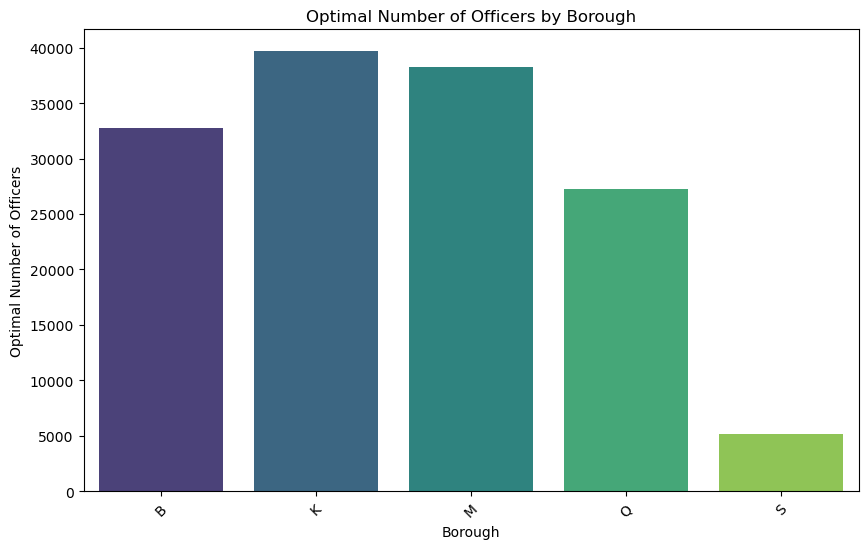

In [19]:
# Creating the DataFrame with the provided data
optimal_officers_data = {
    'Borough': ['B', 'K', 'M', 'Q', 'S'],
    'Optimal Number of Officers': [32756.65, 39659.15, 38258.28, 27283.97, 5179.80]
}
optimal_officers_df = pd.DataFrame(optimal_officers_data)

# Bar Plot: Optimal Number of Officers by Borough
plt.figure(figsize=(10, 6))
sns.barplot(data=optimal_officers_df, x='Borough', y='Optimal Number of Officers', palette="viridis")
plt.title('Optimal Number of Officers by Borough')
plt.xlabel('Borough')
plt.ylabel('Optimal Number of Officers')
plt.xticks(rotation=45)
plt.show()


# Calculating Budget Requirement for Officer Allocation

### Purpose:
This code calculates the total budget requirement for deploying officers in each borough, considering costs like salary, equipment, and training.

### Steps:
1. **Define Costs**:
   - Officer cost breakdown:
     - **Base Salary**: $60,000
     - **Equipment**: $5,000
     - **Training**: $3,000
   - Total cost per officer: $68,000.

2. **Officer Requirements**:
   - Defined the number of officers required for each borough (`officers_needed`).

3. **Calculate Budget**:
   - Multiplied the number of officers by the total cost per officer for each borough.
   - Summed up the costs across boroughs to calculate the **total budget**.

4. **Create DataFrame**:
   - Constructed a DataFrame (`budget_df`) for better presentation:
     - Columns: `Borough` and `Budget Requirement`.

5. **Output**:
   - Displays the budget requirement for each borough and the total budget.

### Example Output:
The table shows budget requirements for boroughs like `B`, `K`, `M`, `Q`, and `S`, followed by the total budget required.


In [20]:
import pandas as pd
from scipy.optimize import linprog

# Example cost parameters per officer
cost_per_officer = {
    'base_salary': 60000,
    'equipment': 5000,
    'training': 3000
}

# Total cost per officer
total_cost_per_officer = sum(cost_per_officer.values())

# Existing data with additional scenario for number of officers
officers_needed = {'B': 43676, 'K': 52879, 'M': 51011, 'Q': 36379, 'S': 6906}

# Calculate total budget requirement for each scenario
budget_requirement = {boro: count * total_cost_per_officer for boro, count in officers_needed.items()}
total_budget = sum(budget_requirement.values())

# Create DataFrame for presentation
budget_df = pd.DataFrame(list(budget_requirement.items()), columns=['Borough', 'Budget Requirement'])

# Show the budget requirement table
print(budget_df)
print("Total Budget Required: ${:,.2f}".format(total_budget))


  Borough  Budget Requirement
0       B          2969968000
1       K          3595772000
2       M          3468748000
3       Q          2473772000
4       S           469608000
Total Budget Required: $12,977,868,000.00


# Budget Requirement by Borough (Visualization)

### Purpose:
This code visualizes the budget requirements for officer allocation in each borough, expressed in millions of dollars.

### Steps:
1. **Convert Budget to Millions**:
   - Added a new column to the DataFrame:
     - **`Budget Requirement (in MM)`**: Budget divided by 1,000,000 for readability.

2. **Create Bar Chart**:
   - Used `sns.barplot()` to create a bar chart showing the budget requirement for each borough.
   - Customizations:
     - **Color Palette**: Used `coolwarm` for a visually appealing gradient.
     - Rotated x-axis labels for better readability.
     - Labeled the axes and added a title for context.

### Output:
The resulting bar chart provides a clear comparison of budget requirements across boroughs, helping visualize resource allocation in terms of millions of dollars.


/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_28947/1398450605.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=budget_df, x='Borough', y='Budget Requirement (in MM)', palette="coolwarm")


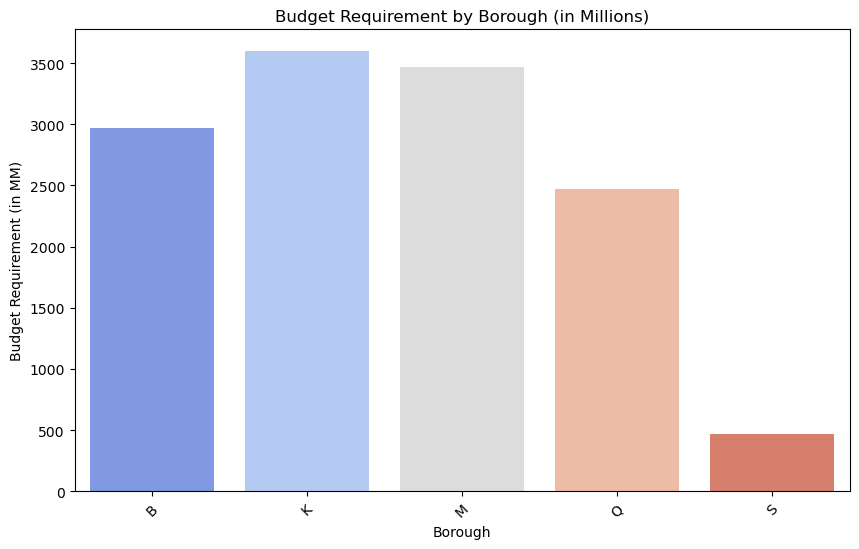

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert budget requirement to millions for plotting
budget_df['Budget Requirement (in MM)'] = budget_df['Budget Requirement'] / 1_000_000

# Bar Plot: Budget Requirement by Borough (in millions)
plt.figure(figsize=(10, 6))
sns.barplot(data=budget_df, x='Borough', y='Budget Requirement (in MM)', palette="coolwarm")
plt.title('Budget Requirement by Borough (in Millions)')
plt.xlabel('Borough')
plt.ylabel('Budget Requirement (in MM)')
plt.xticks(rotation=45)
plt.show()
